In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [2]:
taxi_df=pd.read_csv(r"C:\Users\razas\Downloads\Random Forest\TaxiFare.csv",header=0,index_col=0)
taxi_df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
unique_id,,,,,,,
26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [3]:
taxi_df.shape
taxi_df.info()
taxi_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 26:21.0 to 13:14.0
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   amount                50000 non-null  float64
 1   date_time_of_pickup   50000 non-null  object 
 2   longitude_of_pickup   50000 non-null  float64
 3   latitude_of_pickup    50000 non-null  float64
 4   longitude_of_dropoff  50000 non-null  float64
 5   latitude_of_dropoff   50000 non-null  float64
 6   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 3.1+ MB


,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [4]:
taxi_df=taxi_df.reset_index()

In [5]:
taxi_df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [6]:
taxi_df.drop("unique_id" ,axis=1,inplace=True)

In [7]:
taxi_df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [8]:

import datetime as dt

# Ensure the date_time_of_pickup column is in datetime format
taxi_df['date_time_of_pickup'] = pd.to_datetime(taxi_df['date_time_of_pickup'])

# Extract various date-time components as separate variables
taxi_df = taxi_df.assign(hour=taxi_df['date_time_of_pickup'].dt.hour,
                         day=taxi_df['date_time_of_pickup'].dt.day,
                         month=taxi_df['date_time_of_pickup'].dt.month,
                         year=taxi_df['date_time_of_pickup'].dt.year,
                         dayofweek=taxi_df['date_time_of_pickup'].dt.dayofweek)

# Display the updated DataFrame (optional)
taxi_df.head()


,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,month,year,dayofweek
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,17,15,6,2009,0
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,16,5,1,2010,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0,18,8,2011,3
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,4,21,4,2012,5
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,7,9,3,2010,1


In [9]:
# Check for invalid latitude and longitude values
invalid_latitudes = taxi_df[(taxi_df['latitude_of_pickup'] < -90) | (taxi_df['latitude_of_pickup'] > 90) |
                            (taxi_df['latitude_of_dropoff'] < -90) | (taxi_df['latitude_of_dropoff'] > 90)]

invalid_longitudes = taxi_df[(taxi_df['longitude_of_pickup'] < -180) | (taxi_df['longitude_of_pickup'] > 180) |
                             (taxi_df['longitude_of_dropoff'] < -180) | (taxi_df['longitude_of_dropoff'] > 180)]

# Print out invalid data for review
print("Invalid Latitude Data:\n", invalid_latitudes)
print("Invalid Longitude Data:\n", invalid_longitudes)

# Remove rows with invalid latitudes or longitudes
taxi_df = taxi_df[~((taxi_df['latitude_of_pickup'] < -90) | (taxi_df['latitude_of_pickup'] > 90) |
                    (taxi_df['latitude_of_dropoff'] < -90) | (taxi_df['latitude_of_dropoff'] > 90) |
                    (taxi_df['longitude_of_pickup'] < -180) | (taxi_df['longitude_of_pickup'] > 180) |
                    (taxi_df['longitude_of_dropoff'] < -180) | (taxi_df['longitude_of_dropoff'] > 180))]



Invalid Latitude Data:
       amount       date_time_of_pickup  longitude_of_pickup  \
5686     3.3 2011-07-30 11:15:00+00:00           -73.947235   

      latitude_of_pickup  longitude_of_dropoff  latitude_of_dropoff  \
5686          401.083332            -73.951392            40.778927   

      no_of_passenger  hour  day  month  year  dayofweek  
5686                1    11   30      7  2011          5  
Invalid Longitude Data:
 Empty DataFrame
Columns: [amount, date_time_of_pickup, longitude_of_pickup, latitude_of_pickup, longitude_of_dropoff, latitude_of_dropoff, no_of_passenger, hour, day, month, year, dayofweek]
Index: []


In [10]:
# Now apply the haversine function after cleaning the data
from haversine import haversine, Unit

# Calculate the travel distance in kilometers using the Haversine formula
taxi_df['travel_dist_km'] = taxi_df.apply(
    lambda row: haversine(
        (row['latitude_of_pickup'], row['longitude_of_pickup']),
        (row['latitude_of_dropoff'], row['longitude_of_dropoff']),
        unit=Unit.KILOMETERS
    ), axis=1
)

# Round the calculated travel distance to 2 decimal places
taxi_df['travel_dist_km'] = taxi_df['travel_dist_km'].round(2)

# Display the updated DataFrame (optional)
taxi_df[['latitude_of_pickup', 'longitude_of_pickup', 'latitude_of_dropoff', 'longitude_of_dropoff', 'travel_dist_km']].head()


,latitude_of_pickup,longitude_of_pickup,latitude_of_dropoff,longitude_of_dropoff,travel_dist_km
0,40.721319,-73.844311,40.712278,-73.841610,1.03
1,40.711303,-74.016048,40.782004,-73.979268,8.45
2,40.761270,-73.982738,40.750562,-73.991242,1.39
3,40.733143,-73.987130,40.758092,-73.991567,2.80
4,40.768008,-73.968095,40.783762,-73.956655,2.00


In [11]:
taxi_df.drop(['longitude_of_pickup', 'latitude_of_pickup',
       'longitude_of_dropoff', 'latitude_of_dropoff',"date_time_of_pickup"],axis=1,inplace=True)

In [12]:
taxi_df.head()

,amount,no_of_passenger,hour,day,month,year,dayofweek,travel_dist_km
0,4.5,1,17,15,6,2009,0,1.03
1,16.9,1,16,5,1,2010,1,8.45
2,5.7,2,0,18,8,2011,3,1.39
3,7.7,1,4,21,4,2012,5,2.80
4,5.3,1,7,9,3,2010,1,2.00


In [13]:
X=taxi_df.values[:,1:]
Y=taxi_df.values[:,0]

In [14]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(X)

X=scaler.transform(X)

In [15]:
from sklearn.model_selection import train_test_split
 
#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, 
                                                    random_state=10) 

In [16]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Uncomment if XGBoost is installed
# from xgboost import XGBRegressor

# List of models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "KNN Regressor": KNeighborsRegressor(),
    "SVR": SVR(),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

# Function to evaluate models
def evaluate_model_performance(model, X_train, X_test, Y_train, Y_test):
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    
    # R-squared
    r2 = r2_score(Y_test, Y_pred)
    print(f"R-squared: {r2:.4f}")
    
    # RMSE
    rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
    print(f"RMSE: {rmse:.4f}")
    
    # Adjusted R-squared
    n = len(Y_test)   # Number of observations
    p = X_test.shape[1]   # Number of predictors
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    print(f"Adjusted R-squared: {adjusted_r2:.4f}\n")

# Evaluate each model
for name, model in models.items():
    print(f"Evaluating {name}")
    evaluate_model_performance(model, X_train, X_test, Y_train, Y_test)


Evaluating Linear Regression
R-squared: 0.0140
RMSE: 9.3242
Adjusted R-squared: 0.0135

Evaluating Decision Tree
R-squared: 0.4838
RMSE: 6.7467
Adjusted R-squared: 0.4835

Evaluating Random Forest
R-squared: 0.7300
RMSE: 4.8795
Adjusted R-squared: 0.7298

Evaluating KNN Regressor
R-squared: -0.1422
RMSE: 10.0353
Adjusted R-squared: -0.1427

Evaluating SVR
R-squared: -0.0488
RMSE: 9.6166
Adjusted R-squared: -0.0493

Evaluating XGBoost
R-squared: 0.7047
RMSE: 5.1025
Adjusted R-squared: 0.7046



# Random Forest show the highest accuracy and r2 vale

In [19]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
random_forest_regressor.fit(X_train, Y_train)

# Predict continuous values (regression output) for the test set
y_pred = random_forest_regressor.predict(X_test)

# Print the predicted values
print("Predicted Values:\n", y_pred)



Predicted Values:
 [31.2974      9.47        6.92       ...  4.39566667 13.435
 11.52      ]


In [20]:
# Create a DataFrame to store predictions and actual values
predictions_df = pd.DataFrame({
    'Actual': Y_test,
    'Predicted': y_pred
})

# Convert DataFrame to Excel
predictions_df.to_excel('Fare_pred.xlsx', index=False)

print("Predictions have been saved to 'Fare_pred.xlsx'")

Predictions have been saved to 'Fare_pred.xlsx'


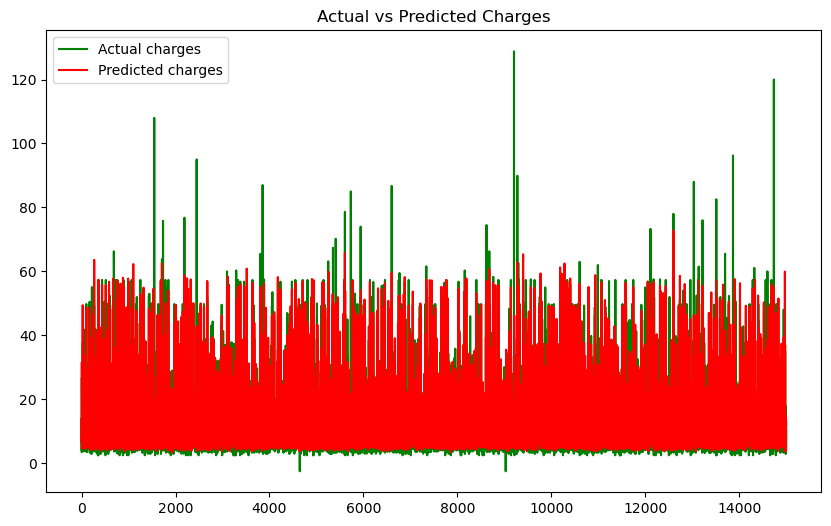

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a copy of X_test into a DataFrame
new_df = pd.DataFrame(X_test.copy())

# Ensure Y_test and y_pred are reshaped if necessary and assigned as Series
new_df["Actual charges"] = pd.Series(Y_test).reset_index(drop=True)
new_df["Predicted charges"] = pd.Series(y_pred).reset_index(drop=True)

# Reset the index of the DataFrame to avoid any index issues
new_df = new_df.reset_index(drop=True)

# Plot Actual vs Predicted charges
plt.figure(figsize=(10,6))
new_df["Actual charges"].plot(color='green', label='Actual charges')
new_df["Predicted charges"].plot(color='red', label='Predicted charges')

# Add title and legend to the plot
plt.title("Actual vs Predicted Charges")
plt.legend()

# Display the plot
plt.show()


# PROJECT ENDS HERE